# Markov Chains

* **Author:**

* **Date:**

* **Time spent on this assignment:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['resetMe','np','plt','random']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    return
import datetime;datetime.datetime.now()

datetime.datetime(2022, 10, 13, 11, 3, 47, 577427)

## Exercise 1: Weather Markov Chains

* **List of collaborators:**

* **References you used in developing your code:**

### 0. Background

In science and engineering, random (or stochastic) processes are commonplace. Electron velocities in a wire, stock prices in the stock market, and traffic congestion on a highway are all examples of time-dependent random processes. To understand such systems, scientists and engineers make use of the Markov chain, a stochastic process model developed by the Russian mathematician Andrey Markov in the 1900s.

A Markov chain is often described as a “memory-less” random process. This means that the next state of the system only depends on the current state and not on any previous states. To see how a Markov chain works, we will study a simple example with a helpful visualization.

Suppose we make a simplistic model of summer weather in Champaign, Illinois using a Markov chain. We say that there are only three states for a day’s weather: sunny, cloudy, and rainy. The Markov chain is specified by the probabilities of transitioning from state 𝐴 to state 𝐵, i.e., from today’s weather 𝐴 to tomorrow’s weather 𝐵, which we call $P(A \rightarrow B)$  For example, maybe we think that 50% of the time a cloudy day leads to a rainy day, so that $P(\textrm{cloudy } \rightarrow \textrm{ rainy})=0.5$  And maybe we believe that 75% of the time a sunny day is followed by another sunny day, so that $𝑃(\textrm{ sunny } \rightarrow \textrm{sunny}) =0.75$  Once we have defined all these transition probabilities we have made a Markov chain such as the one below.

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/MC_weather.png" width=400 align=left></img><br>

Now that we have our Markov chain, what can we do with it? We can sample states from it! Here’s how that works:

1. Start at a state $𝑥_t$. For example, a sunny day.
2. Randomly pick a state $x_{t+1}$ to move to according to the transition probabilities $P(x_t \rightarrow x_{t+1})$.
For example, draw a uniform random number $r$ between 0 and 1. If  $P(\textrm{ sunny } \rightarrow \textrm{sunny}) = 0.90$, $P(\textrm{ sunny } \rightarrow \textrm{cloudy})  = 0.075$, $P(\textrm{ sunny } \rightarrow \textrm{rainy})   = 0.025$, then we say that a random number from 0 to 0.90 goes to a sunny day, one from 0.90 to 0.975 to a cloudy day, and 0.975 to 1.0 to a rainy day. If $r = 0.9234352$, then the next day is cloudy.
3. Increment $t$ and repeat.

A single random sampling might look something like
𝑠𝑢𝑛𝑛𝑦 → 𝑠𝑢𝑛𝑛𝑦 → 𝑠𝑢𝑛𝑛𝑦 → 𝑐𝑙𝑜𝑢𝑑𝑦 → 𝑠𝑢𝑛𝑛𝑦 → 𝑟𝑎𝑖𝑛𝑦 → 𝑐𝑙𝑜𝑢𝑑𝑦 → 𝑟𝑎𝑖𝑛𝑦 → ⋯

Once you are able to sample from this model, you can ask some interesting questions. For example, you could ask: what is the unconditional probability of a rainy day or what is the probability of getting five sunny days in a row? We will look at this in the next exercise.

By now you might be able to see how the random walks we studied earlier were examples of Markov chains. Each step of the random walk only depended on the current position and randomly took the pollen grain to a new position. In that case, the states were represented by continuous variables (position) while in the weather example the states are discrete (sunny, cloudy, or rainy). Nonetheless, the idea is exactly the same.



### a. Weather Probabilities

🦉Implement the Markov chain described in the previous section. The transition probabilities we will use are given in the following table:

|*state*|sunny|cloudy|rainy|
|---------|-------|--------|-------|
|*sunny*  |  0.9  |  0.075 | 0.025|
|*cloudy* | 0.15  |  0.8   | 0.05 |
|*rainy*  | 0.25  | 0.25   | 0.5  |

In particular, run 1000 steps of Markov chain sampling and keep a running (or cumulative) average of how many times you have seen each state. One way to do this is by having three length 1000 arrays `sunnyCounts`, `cloudyCounts`, `rainyCounts` that you fill with zeros and ones at each step, depending on which state you are at. The cumulative average of a sunny day, for example, will then be
```
sunnyCumAvg = np.cumsum(sunnyCounts) / steps_so_far
```

After enough steps, these running averages will approximate the unconditional probability distributions P(sunny), P(cloudy), P(rainy) Your result should look something like the following figure

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/MC_probability.png" width=500 align=left></img><br>

Notice that the Markov chain quickly settles down to equilibrium and the averages converge to constant values. Each Markov chain has an equilibration time. One should always wait until after the equilibration time before collecting statistics from a Markov chain. We have not measured the equilibration time, but for such a simple Markov chain with very few possible states, the equilibration time is very short. There are other time scales, such as the autocorrelation time and the mixing time, that are important to consider when using Markov chains, but I will not discuss them here.

When run for 10000 steps, my Markov chain obtains the following estimates for the unconditional probabilities P(sunny)=0.625, P(cloudy) = 0.3125, P(rainy) =0.06525.  Make sure you obtain similar values. 

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>

Final probabilities = [0.6353 0.3017 0.063 ]


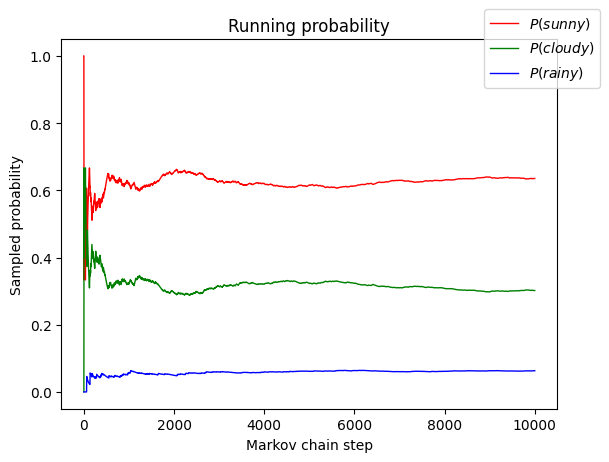

In [2]:
#!Start
# This is a matrix, or table, of transition probabilities between states.
# states are sunny, cloudy, rainy.
transProb = np.array([[0.9, 0.075, 0.025], [0.15, 0.8, 0.05], [0.25,0.25,0.5]])

# The number of states
numStates = 3

# The number of steps in the Markov chain sampling
numSteps = 10000

# The sampled counts and unconditional probabilities P(sunny), P(cloudy), P(rainy)
stateCounts = np.zeros((numSteps, numStates))
stateProbs  = np.zeros((numSteps, numStates))

# The state variable is an index
# 0 = sunny, 1 = cloudy, 2 = rainy
state = 0

for step in range(numSteps):
    stateCounts[step, state] += 1.0    
    
    randomNum = np.random.rand()
    
    # The cumulative transition probabilities for the current state
    cumProb = np.cumsum(transProb[state,:])
    
    nextState = 0
    for possibleState in range(numStates):
        if randomNum < cumProb[possibleState]:
            nextState = possibleState
            break
        
    state = nextState
    
# Compute the sampled probabilities  
for s in range(numStates):
    stateProbs[:,s] = np.cumsum(stateCounts[:,s])
    stateProbs[:,s] /= np.arange(1,numSteps+1)

fig = plt.figure()
ax = fig.gca()


ax.set_xlabel("Markov chain step")
ax.set_ylabel("Sampled probability")
ax.set_title("Running probability") 

# Plot the unconditional probabilities of each state
ax.plot(range(numSteps), stateProbs[:,0], 'r-', linewidth=1, label='$P(sunny)$')
ax.plot(range(numSteps), stateProbs[:,1], 'g-', linewidth=1, label='$P(cloudy)$')
ax.plot(range(numSteps), stateProbs[:,2], 'b-', linewidth=1, label='$P(rainy)$')

print('Final probabilities = ' + str(stateProbs[-1,:]))

ax.legend(bbox_to_anchor=(1.1, 1.1))

plt.show()
#!Stop

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>

-----


## Information about Markov Chain Monte Carlo

Here we will discuss how to use Markov Chain Monte Carlo (MCMC) to compute expectation values.  In statistics, we study the properties of random variables $x$ and their probability distributions $P(x)$.  We often care about computing expectation values of functions of the random variable such as

$$\langle f(x) \rangle = \sum_x f(x) P(x)$$

In general, the probability distribution $P(x)$ can be very complicated and difficult to sample efficiently. In this case, we can use Markov chains to represent the probability distribution $P(x)$.   It is possible to pick the transition probabilities of the Markov chain so that the chain’s equilibrium probability distribution is the desired probability distribution $P(x)$. Once we have a correctly defined Markov chain, we can sample it to obtain a set of sampled states $x_1,x_2,...,x_T$.  These sampled states can be used to estimate expectation values in the following way
$$ \langle f(x) \rangle \approx \frac{1}{T_{max}} \sum_{t=1}^{T_{max}} f(x_t)$$

This should look familiar. This is secretly what we were doing when we were computing the RMS displacement of random walks previously.  However, you should be clear on the distinction between Monte Carlo and Markov chains. Monte Carlo methods are ways to evaluate integrals using random numbers. Markov chains are used to sample complicated probability distributions. When Monte Carlo is used to integrate a probability distribution specified by a Markov chain, then it is called Markov Chain Monte Carlo.

### Metropolis Algorithm

A very common form of Markov Chain Monte Carlo is the Metropolis algorithm. This was the first MCMC algorithm developed. It was proposed in 1953 by Edward Teller, Nicholas Metropolis, and others at Los Alamos National Laboratory in New Mexico during the early days of scientific computing. Teller and his physics colleagues were interested in using MCMC to calculate the thermodynamic properties of a weakly interacting classical gas, which was very difficult to calculate analytically. Impressively, more than half a century after its introduction, Metropolis MCMC is still in wide use today in many areas of science, engineering, and statistics.

The Metropolis algorithm samples a Markov chain by proposing moves between states, which are then either accepted or rejected according to a specific criterion. These proposed moves are chosen so that the Markov chain’s transition probabilities give the correct equilibrium distribution4. In general, Metropolis Markov chain sampling of a probability distribution $P(S)$ works as follows:

1. Start at a state $𝑆_t$.
2. Propose a move to a new state $S'$ based on the current state $S_t$.
3. Choose a uniform random number $r$ between 0 and 1.
4. If $r<P(S')/P(S_t)$ then accept the proposed move and transition to state $S'$ so that $S_{t+1}=S'$   Otherwise, reject the move and stay at state $S_t$ so that $S_{t+1}=S_t$.
5. Increment $t$ and repeat.

This Markov chain’s samples $S_1,...S_{T_{max}}$ are then used to estimate expectation values $\langle f(S) \rangle$ in the way  discussed in the previous section. We will use this general Metropolis MCMC framework to sample the Boltzmann distribution, an important probability distribution in thermal physics.

### Thermal physics and the Boltzmann distribution

In some ways, the type of physics that we encounter most often in our everyday lives is thermal physics. We are perpetually surrounded by a heat bath of $\approx 10^{27}$ particles whizzing around us. The black-body radiation we receive from the sun is in thermal equilibrium with the Earth’s surface. The phases of matter we see and interact with every day, such as liquid water, gaseous oxygen, or solid iron, are all described by the physics of thermodynamics and statistical mechanics.

Physical systems that are in thermal equilibrium with a heat bath obey the laws of statistical mechanics. Heat baths are large physical systems that are assumed to be at a constant temperature $T$. A small system put in contact with a heat bath is able to exchange energy with the heat bath so that it also stays at the same temperature.


<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/MC_heatbath.png" width=400 align=left></img><br>

Statistical mechanics tells us that the probability distribution of the small system’s states in thermal equilibrium with the heat bath is given by the Boltzmann distribution

$$P(S) = \frac{1}{Z} e^{-E(S)/k_BT}$$

where $S$ is a state of the system, $E(S)$  is the energy of the system in state $S$, $T$  is the temperature in Kelvin, $k_B=1.38 \times 10^{-23} J/K$ is the  Boltzmann’s constant, and $Z$ is a normalization constant.  

The Boltzmann distribution tells us which of the small system’s states are most important in thermal equilibrium. In general, at low temperatures, the ground state configuration is most important. At high temperatures $(k_B T \gg E(S))$, all states are equally important.  For intermediate temperatures, things can be quite complicated. In such situations, we can use MCMC to efficiently sample the Boltzmann distribution to understand the thermal physics of our system.

To gain some intuition about the Boltzmann distribution, let’s look at an example. Consider a physical system whose state energies are given by the following quadratic function:
   

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/MC_energy.png" width=400 align=left></img><br>

At different temperatures, there are different Boltzmann distributions for the states. At low, intermediate, and high temperatures, the Boltzmann distributions look like this:

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/MC_prob.png" width=700 align=left></img><br>

As we just discussed, at low temperatures the system is almost always in the ground state (state 50 in this example). At high temperatures, thermal fluctuations make the system equally likely to be in any state. At intermediate temperatures, states close to the ground state are preferred but are not the only states that matter.

## Exercise 2: The thermodynamics of a paramagnetic material

* **List of collaborators:**

* **References you used in developing your code:**

To see what we can do with MCMC and the Boltzmann distribution, let’s consider a simple physical system: a paramagnet. The magnets that you are probably most familiar with in your day-to-day life are ferromagnets, such as iron magnets, which are always magnetized. Paramagnets, however, are only magnetized when they are in the presence of a magnetic field. When you take the field away, they lose their magnetization (unlike ferromagnets, which remain magnetized).

Paramagnets can be described as non-interacting magnetic dipoles in a magnetic field. Here is a cartoon of a paramagnet in one-dimension, with arrows representing dipoles aligned in different directions.

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/MC_spins.png" width=400 align=left></img><br>

Since there are no interactions in this material, each dipole is independent and we can focus on the physics of a single dipole.

Suppose there is a magnetic field $\textbf{B}$ As we know from electromagnetism, the energy of a dipole-magnetic field interaction is

$$E=-\textbf{B} \cdot \textbf{m}$$

where $\textbf{m} = \mu \textbf{S}$ is the dipole moment. These are vector quantities. For simplicity, we will assume
that the magnetic field $\textbf{B}$ points in the 𝑧-direction so that the equation can be written as
$$E = -\mu B \cos \theta$$
where $\theta$ is the angle between the magnetic moment and the magnetic field.

Each orientation of the dipole is called a “state.” The possible states for the dipole are specified by the angle $0\leq \theta < 2\pi$; the probability of such states in thermal equilibrium is given by the Boltzmann distribution

$$P(\theta) = \frac{1}{Z} e^{-E(\theta)/k_bT} = \frac{1}{Z} e^{\mu B \cos(\theta)/k_B T} \equiv \frac{1}{Z} e^{h \cos\theta}$$

where $h=\mu B/k_BT$ is a dimensionless quantity.

Now, we want to use Metropolis Markov Chain Monte Carlo to samples states from $P(\theta)$ To sample states from the Markov chain, we use the steps outlined in the section on the Metropolis algorithm, but filling in the details for this specific problem: 

1. Start at state $\theta_t$

2. Propose a new state $\theta'$ by doing a Gaussian random step away from $\theta_t$.

3. Choose a uniform random number $r$ between $0$ and $1$. 

4.  If $r<P(\theta')/P(\theta_t) = e^{h(\cos\theta'-\cos\theta_t)}$, then accept the move and set $\theta_{t+1}=\theta'$.  Otherwise, reject the move and set $\theta_{t+1}=\theta_t$.

5.  Increment $t$ and repeat.


In this paramagnetic material, the magnetic dipoles want to align with the magnetic field. This means that the magnetization $M=\langle \cos \theta \rangle$, which measures the alignment of the dipole with the magnetic field, will be non-zero. We will estimate this quantity using Metropolis MCMC.  

🦉Write code to implement the Markov chain sampling. You will compute the magnetization for a single dipole using the formula

$M = \langle \cos \theta \rangle \approx \frac{1}{T_{max}} \sum_{t=1}^{T_{max}} \cos \theta_t$

for ten evenly-spaced values of $h$ ($h=\mu B/k_B T$) from $h=-5$ to $h=5$. Use a step size of 0.75 for the Gaussian random step for picking $\theta'$, for example

```
thetaprime = theta[t] + 0.75*np.random.randn()
```

and run the Markov chain for $T_{max}=2000$ steps.  Plot $M$ versus $h$. 

For this problem, there is an exact analytic solution, given by the formula
$$M(h) = I_1(h)/I_0(h)$$
where $I_\nu(z)$  is a modified Bessel function of the second kind of order $\nu$.  

**Plotting**  
🦉Plot your MCMC calculation results and the exact answer given by the above formula on the same plot. You can use the `scipy.special` module to compute the Bessel functions. For example,

```python
import scipy.special as sps 
print(sps.iv(3.0,0.5))
```

prints the value $I_3(0.5)$.

You should obtain a plot that looks like this:


<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/MC_mag.png" width=600 align=left></img><br>

(You don’t need to compute the error bars for your MCMC data points. I included them to illustrate how accurate the results are.)

Note how the magnetization changes with  $h$. For small $|h|$ (high temperature or low magnetic field), the spins fluctuate wildly and so don’t align with the magnetic field, which causes there to be no magnetization. For large $|h|$ (low temperature or high magnetic field), the spins are mostly aligned with the magnetic field and $|M|$ is close to one.

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>

Acceptance ratios      = [0.68415 0.7239  0.75515 0.8062  0.88465 0.99995 0.8844  0.80795 0.7503
 0.7157 ]
Average magnetizations = [-0.89080811 -0.86429715 -0.81757473 -0.67889108 -0.46152113 -0.00304637
  0.46498399  0.70775755  0.79681125  0.85880985]


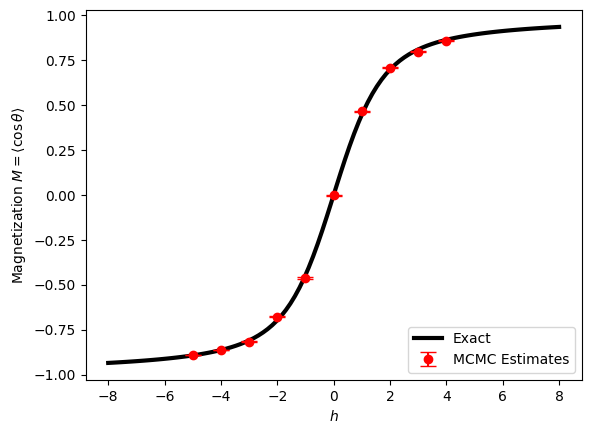

In [3]:
import scipy.special as sps 
#!Start

# The average jump distances of the Markov move used for the Metropolis condition
averageJumpDistances = 0.5 * np.ones(10) #np.array([0.75, 3.0, np.pi])

# The dimensionless magnetic field values to be tested
magneticFields = np.arange(-5,5)#np.linspace(-5, 5, 11)

# The number of different MCMC trials
numTrials = len(magneticFields)

# The number of Markov steps
numSteps = 20000

# The equilibration time of the Markov chain
numEquilSteps = 100

# <\theta^2> = the quantity to estimate
magnetization = np.zeros(numTrials)

# Used to compute standard error of thetaSquared
magnetizationSquared = np.zeros(numTrials)

# The counts of how many moves were accepted in each trial
numAccepts = np.zeros(numTrials)

for trial in range(numTrials):
    h = magneticFields[trial]
    
    theta = 0.0
    for step in range(numSteps+numEquilSteps):
        if step > numEquilSteps:
            magnetization[trial] += np.cos(theta) / numSteps
            magnetizationSquared[trial] += np.cos(theta)**2.0 / numSteps
            
        newTheta = np.mod(theta + averageJumpDistances[trial] * np.random.randn(), 2.0*np.pi)            
            
        r = np.random.rand()
        if r < np.exp(h * (np.cos(newTheta) - np.cos(theta))):
            theta = newTheta
            if step > numEquilSteps:
                numAccepts[trial] += 1.0
                
        
print( 'Acceptance ratios      = ' + str(numAccepts / numSteps))
print( 'Average magnetizations = ' + str(magnetization))

# Plot the results versus the analytic answer.
plt.figure()

numPoints = 100
# The magnetic field values
hPlot = np.linspace(-8, 8, numPoints)
# The partition function
Z = 2.0 * np.pi * sps.i0(hPlot)
# The magnetization
magnetizationAnalytic = 2.0 * np.pi * sps.iv(1.0, hPlot) / Z

plt.plot(hPlot, magnetizationAnalytic, 'k-', linewidth=3, label='Exact')

# Plot the MCMC estimates with standard error bars
magnetizationError = np.sqrt(np.abs(magnetizationSquared - magnetization**2.0)/numSteps)

plt.errorbar(magneticFields, magnetization, color='r', yerr=magnetizationError, marker='o', linestyle='None', capsize=6, label='MCMC Estimates')#elinewidth=3, capsize=6, capthick=3, markersize=10,

plt.xlabel('$h$')
plt.ylabel('Magnetization $M=\\langle \\cos \\theta \\rangle$')
plt.legend(loc=4)

plt.show()
#!Stop


<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>

## Exercise 3: Thermodynamics of rubber bands

* **List of collaborators:**

* **References you used in developing your code:**

We will use Metropolis MCMC to investigate a simple model for rubber bands.

Consider a rubber band cut into a single strip. This strip we model as a one-dimensional chain of $N$ polymers.  These polymers we approximate as being oval in shape and linked together in a line. Each identical polymer has a length $a$ and a much smaller width $b$ so that $b \ll a$.   Each polymer can be in one of two states: *flat* (lying parallel to the chain) or *bent* (lying perpendicular to the chain). 

An example of a possible configuration of an $N=7$ polymer chain with four flat and three bent polymers is shown below


<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/MC_rubberBand1.png" width=400 align=left></img><br>

The length of this particular configuration, when measured from head to tail, is about $Ma=4a$, ignoring the widths of the bent polymers, which are negligible. Note that even though this chain includes bent polymers that point up and down, we won’t consider polymers bent in different directions as being in different states.

The states of the rubber band, unlike the states of the paramagnet in the previous exercise, are discrete and can be labeled with integers. For example, the following three configurations of 7- polymer chains

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/MC_rubberBand2.png" width=400 align=left></img><br>

can be labeled with arrays of binary values:

```python
configuration1 = np.array([1,0,0,0,1,0,1]) 
configuration2 = np.array([0,1,0,1,1,1,1]) 
configuration3 = np.array([0,1,1,1,0,0,0])
```

Here we chose to have the number one represent a flat polymer and the number zero a bent one.

Now, let’s suppose that there is an energy difference $\epsilon$ between a polymer it its flat and bent states, so that the total energy of a configuration $S$ o a rubber band of length $M(S)a$ is 
$$E(S) = \epsilon M(S).$$

It is  straightforward to calculate the length and energy of a configuration of the rubber band. For the first configuration above, we could do this by summing the number of ones in the binary vector:
```python
M1 = np.sum(configuration1) # Will be 3 
length1 = a * M1
energy1 = epsilon * M1
```

### a. Rubber bands at infinite temperature


🦉Write code to calculate the average length of a rubber band of $N=100$ polymers at *infinite temperature* $T=\infty$.  While this might sound mysterious and difficult, it is actually very simple.  At infinite temperature (or, if you prefer, at very high temperature), each polymer configuration is equally likely. We saw this in our discussion of the Boltzmann distribution. To sample this distribution, we need to pick any configuration of polymers with equal probability.


This is a simple probability distribution that we can sample without a Markov chain. Do this by randomly picking polymer configurations in the following way: for each polymer in the chain, flip a coin to decide whether it is flat or bent. Your code should look something like this:

```python
avgLength = 0.0
for sample in range(numSamples):
    # TODO: Write code here to randomly pick a configuration 
    #...
    # TODO: Write code here to compute the configuration’s length 
    # lengthConfiguration = . . .
    avgLength += float(lengthConfiguration) / numSamples
```

🦉Compute this average for `numSamples=10000.` You should obtain that the average length is about $\langle M \rangle a = Na/2 =50a$. At infinite temperature, flat and bent polymers are equally likely so it makes sense that each polymer is on average $a/2$ length.


<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>

In [4]:
#!Start
# number of configuration samples to average over
numSamples  = 10000

# number of polymers in the rubber band
chainLength = 100

avgLength = 0.0
for sample in range(numSamples):
    # Randomly pick a configuration
    configuration = np.random.randint(0,2,size=chainLength)
    
    # Compute the configuration's length
    lengthConfiguration = float(np.sum(configuration))
    
    avgLength += lengthConfiguration / numSamples
    
print('The average length of the polymer at infinite temperature is ' + str(avgLength))
#!Stop

The average length of the polymer at infinite temperature is 50.08240000000034


<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>

### b. Rubber bands at finite temperature

In this problem, we are going to see what happens to a rubber band when we heat it up or cool it down.

We will be using the Metropolis algorithm to estimate the average length of the rubber band in thermal equilibrium, that is $\langle Ma \rangle$.  For this particular problem, the Metropolis Markov chain sampling looks like this:

1.  Start at a polymer chain configuration  $S_t$.   Compute the chain length $M(S_t)$ and use it to update your estimate of $\langle M \rangle$.

2. Propose a new configuration $S'$  by randomly switching a single, randomly selected polymer in $S_t$  from flat to bent, or from bent to flat.

4. If $r<P(S')/P(S_t)= e^{-(E(S')- E(S_t))/k_BT}$, then accept the move and set  $S_{t+1}=S'$ . Otherwise, reject the move and set $S_{t+1}=S_t$.

5.  Increment $t$ and repeat.

🦉Using Metropolis MCMC as we did in the first in-class exercise, write a function that
computes the expectation value of the chain length

$$\langle M \rangle = \sum_S M(S) P(S) \approx \frac{1}{T_{max}} \sum_{t=1}^{T_{max}} M(S_t)$$

given the value of the ratio $\epsilon/k_BT$.  Your function, for instance, can look like this:

```python
# Compute the average chain length using Metropolis MCMC. 
    def computeAvgLength(epsilonRatio):
    # TODO: Write your code to compute avgLength here 
    #...
    return avgLength
```

In your code, work with chains of $N=100$ polymers  and run $T_{max}=10000$ steps of Markov chain sampling for each computation of $\langle M \rangle$. or each $\epsilon/k_BT$ in the array

```python
epsilonRatios = np.linspace(-5.0, 5.0, 21)
```

compute and store the average chain length in an array of the same size. 🦉Plot the normalized chain length $\langle M \rangle/N$ versus $\epsilon/k_BT$ and theck that it matches the following plot.



<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/MC_rubberBand3.png" width=600 align=left></img><br>

From this plot, we can see that when $\epsilon$ is negative flat polymers are energetically preferred and the average length of the rubber band increases. When $\epsilon$ is positive, bent polymers are more energetically favorable and the average length decreases.

Notice the dependence on temperature. When temperature is very high, the rubber band has a nearly equal number of flat and bent polymers and so is about $Na/2$ in length. When temperature is low, then the sign of ! determines whether the rubber band is maximally stretched or contracted.

For the typical rubber bands you would get in the store, the polymers within it energetically prefer to lie flat so that $\epsilon<0.$ . This sign of $\epsilon$ means that rubber bands contract when heated and expanded when cold!

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>

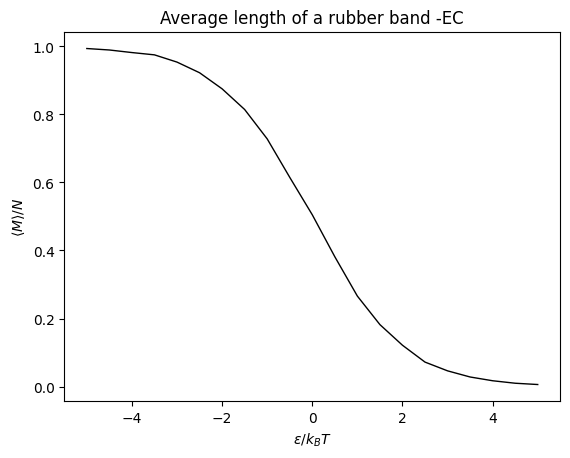

In [5]:
#!Start
def computeAvgLength(chainLength, epsilon, numSteps, numEquilSteps):
    # starting polymer configuration
    conf    = np.ones(chainLength)
    newConf = np.ones(chainLength)
    
    avgLength = 0.0
    
    for step in range(numSteps+numEquilSteps):
        if step >= numEquilSteps:
            avgLength += np.sum(conf) / numSteps
        
        # Propose move to a new configuration that differs at one polymer
        newConf[:] = conf[:]
        randInd = np.random.randint(0, chainLength)
        newConf[randInd] = np.abs(newConf[randInd] - 1)
        
        r = np.random.rand()
        energyDiff = epsilon * (np.sum(newConf) - np.sum(conf))
        ratio = np.exp(-energyDiff)
        
        if r < ratio:
            conf[:] = newConf[:]
            
    return avgLength

# number of Markov chain steps to average over
numSteps  = 10000
# equilibrium steps
numEquilSteps = 1000

chainLength = 100

# epsilon / kT
numPoints  = 21
epsilons   = np.linspace(-5.0, 5.0, numPoints)


# Linear energy plot
avgLengths = np.zeros(numPoints)
for point in range(numPoints):
    avgLengths[point] = computeAvgLength(chainLength, epsilons[point], numSteps, numEquilSteps)

plt.figure()
plt.plot(epsilons, avgLengths / chainLength, 'k-', linewidth=1)
plt.xlabel('$\\epsilon/k_BT$')
plt.ylabel('$\\langle M \\rangle/N$')

plt.title('Average length of a rubber band -EC')

plt.show()

#!Stop

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>

**Q: What happens when $\epsilon/k_BT=0$ ? Explain below**

A:

---
**Acknowledgements: 
* Eli Chertkov and George Gollin (original)

© Copyright 2021
